In [106]:
import numpy as np
from networkx.generators.community import LFR_benchmark_graph
import matplotlib.pyplot as plt

In [107]:
import networkx as nx
import random

In [108]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    size = N/community_number
    for i in range(N):
        com_index = i//size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size*com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size*com_index), int(size*(com_index+1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size*((i//size)+1):
                if np.random.rand() < (average_degree*(1-mu)-k_in_prev)/(size-(i-(size*com_index))+1):
                    G[i][j] = 1
                    G[j][i] = 1
            else:
                if np.random.rand() < (average_degree*(mu)-k_out_prev)/(N-(size*((i//size)+1))+1):
                    G[i][j] = 1
                    G[j][i] = 1
    
    # adjust edges
    sum_edges = N * average_degree / 2
    cur_edges = 0
    for i in range(N):
        for j in range(i, N):
            if G[i][j] != 0:
                cur_edges += 1
    size = int(size)
    cur_edges = cur_edges
    print("sum_edges:{0}, cur_edges:{1}".format(sum_edges, cur_edges))
    if sum_edges > cur_edges:
        remain = sum_edges - cur_edges
        while remain > 0:
            for j in range(community_number):
                row = random.sample(range(j * size, (j + 1) * size), 1)
                k = random.sample(range(N), 1)
                row = row[0]
                k = k[0]
                if G[row][k] == 0:
                    G[row][k] = np.random.randn()
                    G[k][row] = np.random.randn()
                    remain -= 1
                    if remain == 0:
                        break
    elif sum_edges < cur_edges:
        remain = cur_edges - sum_edges
        while remain > 0:
            for j in range(community_number):
                row = random.sample(range(j * size, (j + 1) * size), 1)
                k = random.sample(range(N), 1)
                row = row[0]
                k = k[0]
                if G[row][k] != 0:
                    G[row][k] = 0
                    G[k][row] = 0
                    remain -= 1
                    if remain == 0:
                        break
    
    return G

In [109]:
G_array = make_modular_network(100, 15, 2, 0.1)
G=nx.from_numpy_matrix(G_array) 

sum_edges:750.0, cur_edges:758


In [110]:
G.degree() # 打印每个节点的度为多少

DegreeView({0: 11, 1: 18, 2: 17, 3: 15, 4: 17, 5: 13, 6: 16, 7: 14, 8: 15, 9: 12, 10: 13, 11: 13, 12: 18, 13: 14, 14: 15, 15: 18, 16: 12, 17: 18, 18: 14, 19: 16, 20: 18, 21: 18, 22: 17, 23: 12, 24: 14, 25: 13, 26: 12, 27: 17, 28: 15, 29: 14, 30: 11, 31: 16, 32: 11, 33: 12, 34: 15, 35: 14, 36: 18, 37: 15, 38: 12, 39: 15, 40: 14, 41: 17, 42: 15, 43: 14, 44: 17, 45: 13, 46: 17, 47: 18, 48: 14, 49: 17, 50: 8, 51: 19, 52: 20, 53: 20, 54: 15, 55: 17, 56: 15, 57: 13, 58: 16, 59: 12, 60: 17, 61: 11, 62: 18, 63: 17, 64: 14, 65: 11, 66: 18, 67: 15, 68: 13, 69: 18, 70: 14, 71: 14, 72: 13, 73: 19, 74: 18, 75: 15, 76: 14, 77: 16, 78: 15, 79: 15, 80: 16, 81: 11, 82: 13, 83: 10, 84: 13, 85: 15, 86: 19, 87: 15, 88: 14, 89: 17, 90: 13, 91: 14, 92: 18, 93: 16, 94: 17, 95: 13, 96: 20, 97: 13, 98: 15, 99: 14})

In [111]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

In [112]:
print(degree_sequence)
print(len(degree_sequence)) # 结点个数

[20, 20, 20, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 8]
100


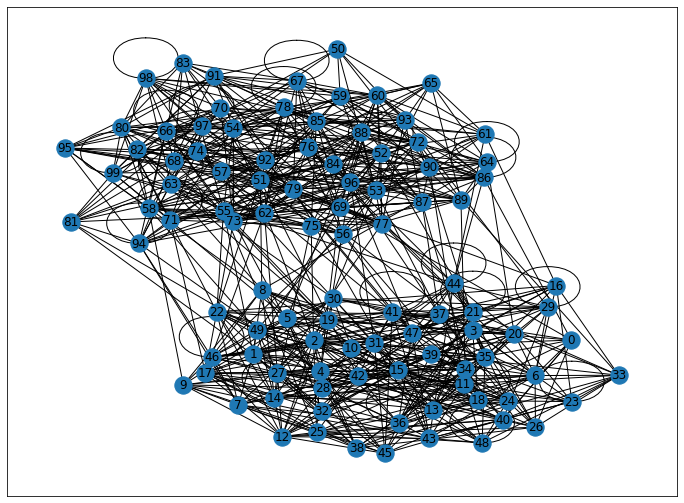

In [113]:
plt.figure(figsize=(12, 9))
nx.draw_networkx(G)

sum_edges:750.0, cur_edges:770
Graph with 100 nodes and 750 edges


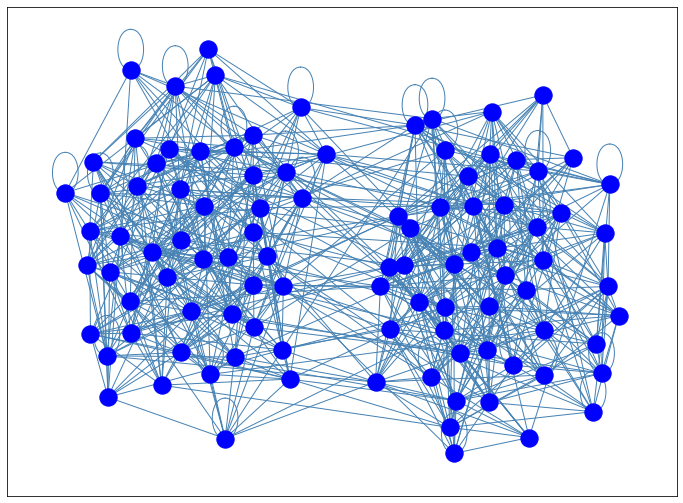

In [114]:
G_array = make_modular_network(100, 15, 2, 0.1)
G=nx.from_numpy_matrix(G_array)
print(G)
# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
path = "D:\\Pycharm\\Project\\learnPython\\learn_python\\ESN\\Image\\modularity\\normal_modulary\\"
plt.figure(figsize=(12, 9))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('on')
# plt.savefig(path+'normal_modularity_0.1.png', dpi=100)

sum_edges:750.0, cur_edges:750
Graph with 100 nodes and 750 edges


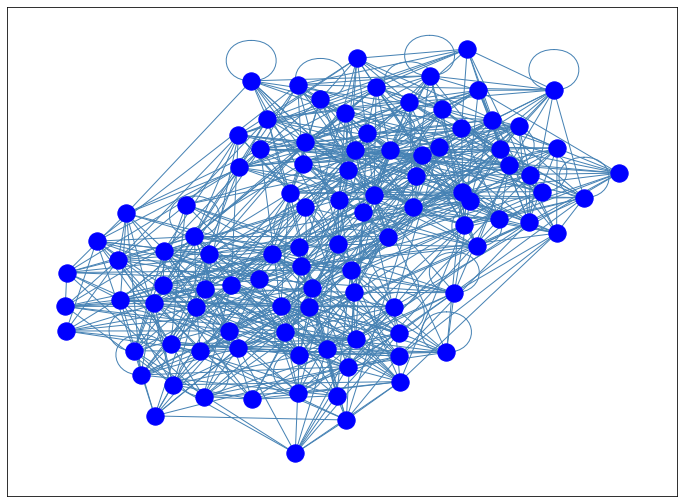

In [115]:
G_array = make_modular_network(100, 15, 2, 0.2)
G=nx.from_numpy_matrix(G_array)
print(G)
# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
path = "D:\\Pycharm\\Project\\learnPython\\learn_python\\ESN\\Image\\modularity\\normal_modulary\\"
plt.figure(figsize=(12, 9))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('on')
# plt.savefig(path+'normal_modularity_0.2.png', dpi=100)

sum_edges:750.0, cur_edges:800
Graph with 100 nodes and 750 edges


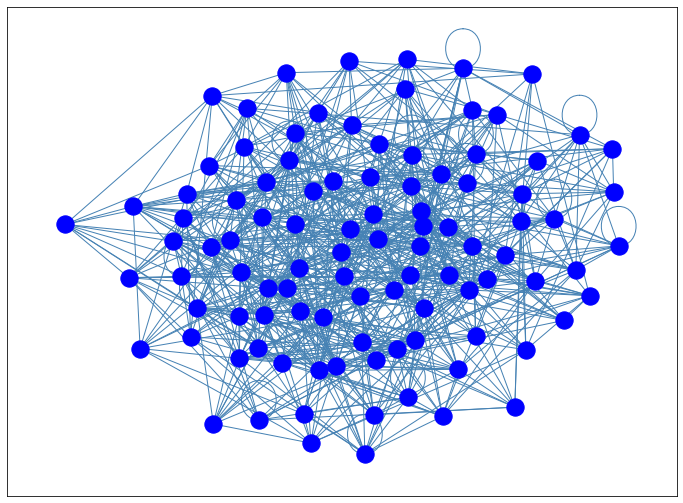

In [116]:
G_array = make_modular_network(100, 15, 2, 0.3)
G=nx.from_numpy_matrix(G_array)
print(G)
# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
path = "D:\\Pycharm\\Project\\learnPython\\learn_python\\ESN\\Image\\modularity\\normal_modulary\\"
plt.figure(figsize=(12, 9))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('on')
# plt.savefig(path+'normal_modularity_0.3.png', dpi=100)

sum_edges:750.0, cur_edges:737
Graph with 100 nodes and 750 edges


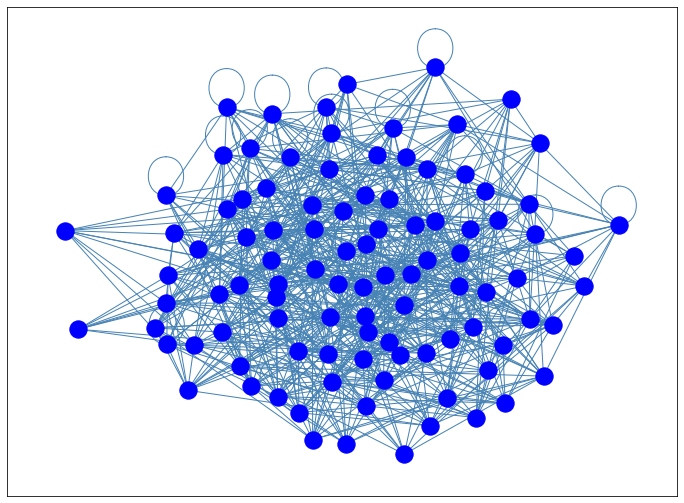

In [117]:
G_array = make_modular_network(100, 15, 2, 0.4)
G=nx.from_numpy_matrix(G_array)
print(G)
# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
path = "D:\\Pycharm\\Project\\learnPython\\learn_python\\ESN\\Image\\modularity\\normal_modulary\\"
plt.figure(figsize=(12, 9))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('on')
# plt.savefig(path+'normal_modularity_0.4.png', dpi=100)

sum_edges:750.0, cur_edges:786
Graph with 100 nodes and 750 edges


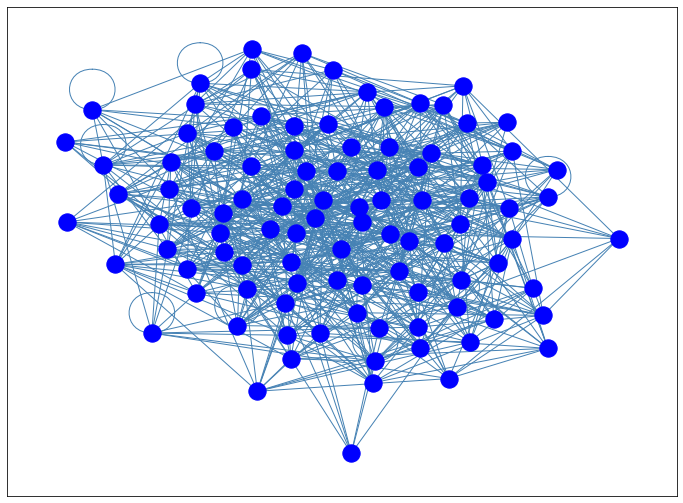

In [118]:
G_array = make_modular_network(100, 15, 2, 0.5)
G=nx.from_numpy_matrix(G_array)
print(G)
# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
path = "D:\\Pycharm\\Project\\learnPython\\learn_python\\ESN\\Image\\modularity\\normal_modulary\\"
plt.figure(figsize=(12, 9))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('on')
# plt.savefig(path+'normal_modularity_0.5.png', dpi=100)

sum_edges:1500.0, cur_edges:1630
Graph with 500 nodes and 1500 edges


(-0.9712592400610445,
 1.0723662860691547,
 -1.205837655812502,
 1.1668037511408327)

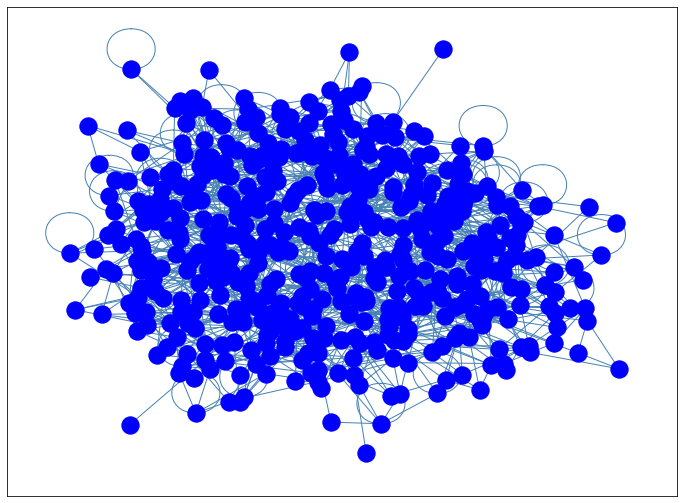

In [121]:
G_array = make_modular_network(500, 6, 10, 0.2)
G=nx.from_numpy_matrix(G_array)
print(G)
# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
path = "D:\\Pycharm\\Project\\learnPython\\learn_python\\ESN\\Image\\modularity\\normal_modulary\\"
plt.figure(figsize=(12, 9))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('on')
# plt.savefig(path+'normal_modularity_0.5_1.png', dpi=100)